# Part I

In [65]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import time
import random
import statsmodels.api as sm
import sklearn.model_selection as ms
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style = "whitegrid")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor, export_graphviz

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [66]:
raw_orders = pd.read_csv('../data/Orders.csv')
raw_orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [67]:
raw_orders.columns = list(map(lambda x: x.replace('.', '_'), raw_orders.columns))
raw_orders.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,State,Country,Region,Market,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [68]:
raw_orders.shape

(51290, 24)

In [69]:
raw_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row_ID          51290 non-null  int64  
 1   Order_ID        51290 non-null  object 
 2   Order_Date      51290 non-null  object 
 3   Ship_Date       51290 non-null  object 
 4   Ship_Mode       51290 non-null  object 
 5   Customer_ID     51290 non-null  object 
 6   Customer_Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   Postal_Code     9994 non-null   float64
 9   City            51290 non-null  object 
 10  State           51290 non-null  object 
 11  Country         51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Market          51290 non-null  object 
 14  Product_ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub_Category    51290 non-null  object 
 17  Product_Name    51290 non-null 

In [70]:
np.sum(raw_orders.isnull())

Row_ID                0
Order_ID              0
Order_Date            0
Ship_Date             0
Ship_Mode             0
Customer_ID           0
Customer_Name         0
Segment               0
Postal_Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product_ID            0
Category              0
Sub_Category          0
Product_Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping_Cost         0
Order_Priority        0
dtype: int64

In [71]:
raw_orders.describe()

,Row_ID,Postal_Code,Quantity,Discount,Shipping_Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,3.476545,0.142908,26.478567
std,14806.29199,32063.693350,2.278766,0.212280,57.251373
min,1.00000,1040.000000,1.000000,0.000000,1.002000
25%,12823.25000,23223.000000,2.000000,0.000000,2.610000
50%,25645.50000,56430.500000,3.000000,0.000000,7.790000
75%,38467.75000,90008.000000,5.000000,0.200000,24.450000
max,51290.00000,99301.000000,14.000000,0.850000,933.570000


In [72]:
raw_orders.Country.unique()

array(['United States', 'Australia', 'Germany', 'Senegal', 'New Zealand',
       'Afghanistan', 'Saudi Arabia', 'Brazil', 'China', 'France',
       'Italy', 'Tanzania', 'Poland', 'United Kingdom', 'Mexico',
       'El Salvador', 'Taiwan', 'India', 'Dominican Republic',
       'Democratic Republic of the Congo', 'Indonesia', 'Uruguay', 'Iran',
       'Mozambique', 'Bangladesh', 'Spain', 'Ukraine', 'Nicaragua',
       'Morocco', 'Philippines', 'Austria', 'Colombia', 'Netherlands',
       'Malaysia', 'Ecuador', 'Thailand', 'Somalia', 'Guatemala',
       'Belarus', 'Cambodia', 'South Africa', 'Canada', 'Japan', 'Russia',
       'Egypt', 'Azerbaijan', 'Lithuania', 'Argentina', 'Lesotho',
       'Vietnam', 'Cuba', 'Romania', 'Turkey', 'Cameroon', 'Hungary',
       'Singapore', 'Angola', 'Belgium', 'Pakistan', 'Finland', 'Ghana',
       'Zambia', 'Iraq', 'Liberia', 'Georgia', 'Switzerland', 'Albania',
       'Chad', 'Montenegro', 'Namibia', 'Portugal', 'Madagascar',
       'Sweden', 'Myanmar 

In [73]:
raw_orders.Quantity.value_counts()

2     12748
3      9682
1      8963
4      6385
5      4882
6      3020
7      2385
8      1361
9       987
10      276
14      186
12      176
11      156
13       83
Name: Quantity, dtype: int64

## Problem 1

In [74]:
raw_orders[['Profit']]

,Profit
0,$62.15
1,-$288.77
2,$919.97
3,-$96.54
4,$311.52
...,...
51285,$4.50
51286,$3.34
51287,$2.48
51288,$2.40


In [75]:
raw_orders.Sales

0          $221.98
1        $3,709.40
2        $5,175.17
3        $2,892.51
4        $2,832.96
           ...    
51285       $65.10
51286       $16.72
51287        $8.56
51288       $13.44
51289       $61.38
Name: Sales, Length: 51290, dtype: object

In [76]:
data_orders = raw_orders.copy()

In [77]:
data_orders.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Postal_Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product_ID', 'Category',
       'Sub_Category', 'Product_Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping_Cost', 'Order_Priority'],
      dtype='object')

In [78]:
data_orders['Profit'] = data_orders['Profit'].map(lambda x: float(x.replace('$', '').replace(',', '')))
data_orders[['Profit']].head()

,Profit
0,62.15
1,-288.77
2,919.97
3,-96.54
4,311.52


In [79]:
data_orders['Sales'] = data_orders['Sales'].map(lambda x: float(x.replace('$', '').replace(',', '')))
data_orders[['Sales']].head()

,Sales
0,221.98
1,3709.40
2,5175.17
3,2892.51
4,2832.96


In [80]:
data_orders.dtypes

Row_ID              int64
Order_ID           object
Order_Date         object
Ship_Date          object
Ship_Mode          object
Customer_ID        object
Customer_Name      object
Segment            object
Postal_Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product_ID         object
Category           object
Sub_Category       object
Product_Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping_Cost     float64
Order_Priority     object
dtype: object

## Problem 2

### #2.1

In [81]:
season_data = data_orders.copy()

In [82]:
import datetime

season_data['Order_M_Y'] = pd.to_datetime(season_data['Order_Date']).dt.to_period('M')
season_data['Ship_M_Y'] = pd.to_datetime(season_data['Ship_Date']).dt.to_period('M')
season_data.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,State,Country,Region,Market,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Order_M_Y,Ship_M_Y
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,2014-11,2014-11
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2014-02,2014-02
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,2014-10,2014-10
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,2014-01,2014-01
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,2014-11,2014-11


In [83]:
# should change the Order.Date to reflect the months of the seasons

season_data = season_data.sort_values('Order_M_Y', ascending=True)
season_data.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,State,Country,Region,Market,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Order_M_Y,Ship_M_Y
9257,11999,ES-2012-RP1985548-40920,1/12/12,1/19/12,Standard Class,RP-1985548,Roy Phan,Corporate,NaN,Lohne,Lower Saxony,Germany,Western Europe,Europe,FUR-BO-4867,Furniture,Bookcases,"Ikea Stackable Bookrack, Traditional",551.61,5,0.1,165.36,35.98,Medium,2012-01,2012-01
12684,48120,MG-2012-SH997584-40929,1/21/12,1/27/12,Standard Class,SH-997584,Sally Hughsby,Corporate,NaN,Ulan Bator,Ulaanbaatar,Mongolia,Eastern Asia,Asia Pacific,FUR-CH-5447,Furniture,Chairs,"Office Star Rocking Chair, Black",276.96,2,0.0,55.38,24.75,Medium,2012-01,2012-01
31883,9273,MX-2012-VG2179018-40926,1/18/12,1/23/12,Standard Class,VG-2179018,Vivek Gonzalez,Consumer,NaN,Manaus,Amazonas,Brazil,South America,LATAM,OFF-FA-5462,Office Supplies,Fasteners,"OIC Clamps, 12 Pack",38.40,3,0.0,6.12,4.70,Medium,2012-01,2012-01
2709,30450,ID-2012-KL1664592-40911,1/3/12,1/9/12,Standard Class,KL-1664592,Ken Lonsdale,Consumer,NaN,Papakura,Auckland,New Zealand,Oceania,Asia Pacific,TEC-CO-4593,Technology,Copiers,"Hewlett Wireless Fax, Laser",912.46,4,0.4,-319.46,107.10,Low,2012-01,2012-01
34012,15911,IT-2012-DP1300045-40916,1/8/12,1/14/12,Standard Class,DP-1300045,Darren Powers,Consumer,NaN,Toulouse,Languedoc-Roussillon-Midi-Pyrénées,France,Western Europe,Europe,OFF-AR-3499,Office Supplies,Art,"Binney & Smith Sketch Pad, Blue",115.80,5,0.5,-55.65,3.91,Medium,2012-01,2012-01


In [84]:
group_season = season_data.groupby(['Order_M_Y', 'Category'])[['Quantity']].agg('sum')
group_season

Quantity
Order_M_Y Category                 
2012-01   Furniture             246
          Office Supplies       997
          Technology            220
2012-02   Furniture             278
          Office Supplies       800
          Technology            323
2012-03   Furniture             319
          Office Supplies      1093
          Technology            333
2012-04   Furniture             326
          Office Supplies      1233
          Technology            375
2012-05   Furniture             409
          Office Supplies      1268
          Technology            490
2012-06   Furniture             680
          Office Supplies      1746
          Technology            576
2012-07   Furniture             313
          Office Supplies      1142
          Technology            381
2012-08   Furniture             569
          Office Supplies      1822
          Technology            629
2012-09   Furniture             757
          Office Supplies      2327
          Technology            560
2012-10   Furniture             637
          Office Supplies      1773
          Technology            571
2012-11   Furniture             799
          Office Supplies      2341
          Technology            784
2012-12   Furniture             963
          Office Supplies      2447
          Technology            916
2013-01   Furniture             400
          Office Supplies      1108
          Technology            366
2013-02   Furniture             286
          Office Supplies       839
          Technology            319
2013-03   Furniture             457
          Office Supplies      1316
          Technology            464
2013-04   Furniture             422
          Office Supplies      1298
          Technology            530
2013-05   Furniture             481
          Office Supplies      1872
          Technology            568
2013-06   Furniture             718
          Office Supplies      2236
          Technology            717
2013-07   Furniture             466
          Office Supplies      1402
          Technology            453
2013-08   Furniture             647
          Office Supplies      2370
          Technology            801
2013-09   Furniture             803
          Office Supplies      2519
          Technology            883
2013-10   Furniture             657
          Office Supplies      2114
          Technology            792
2013-11   Furniture            1135
          Office Supplies      3190
          Technology            868
2013-12   Furniture             794
          Office Supplies      2884
          Technology            936
2014-01   Furniture             544
          Office Supplies      1452
          Technology            417
2014-02   Furniture             453
          Office Supplies      1279
          Technology            370
2014-03   Furniture             582
          Office Supplies      1576
          Technology            528
2014-04   Furniture             529
          Office Supplies      1652
          Technology            507
2014-05   Furniture             737
          Office Supplies      2359
          Technology            712
2014-06   Furniture             960
          Office Supplies      3262
          Technology           1105
2014-07   Furniture             654
          Office Supplies      1929
          Technology            669
2014-08   Furniture             883
          Office Supplies      3148
          Technology            903
2014-09   Furniture            1169
          Office Supplies      3590
          Technology           1034
2014-10   Furniture             866
          Office Supplies      2214
          Technology            803
2014-11   Furniture            1084
          Office Supplies      3342
          Technology           1130
2014-12   Furniture            1222
          Office Supplies      3361
          Technology           1111
2015-01   Furniture             560
          Office Supplies      

<AxesSubplot:xlabel='Order_M_Y'>

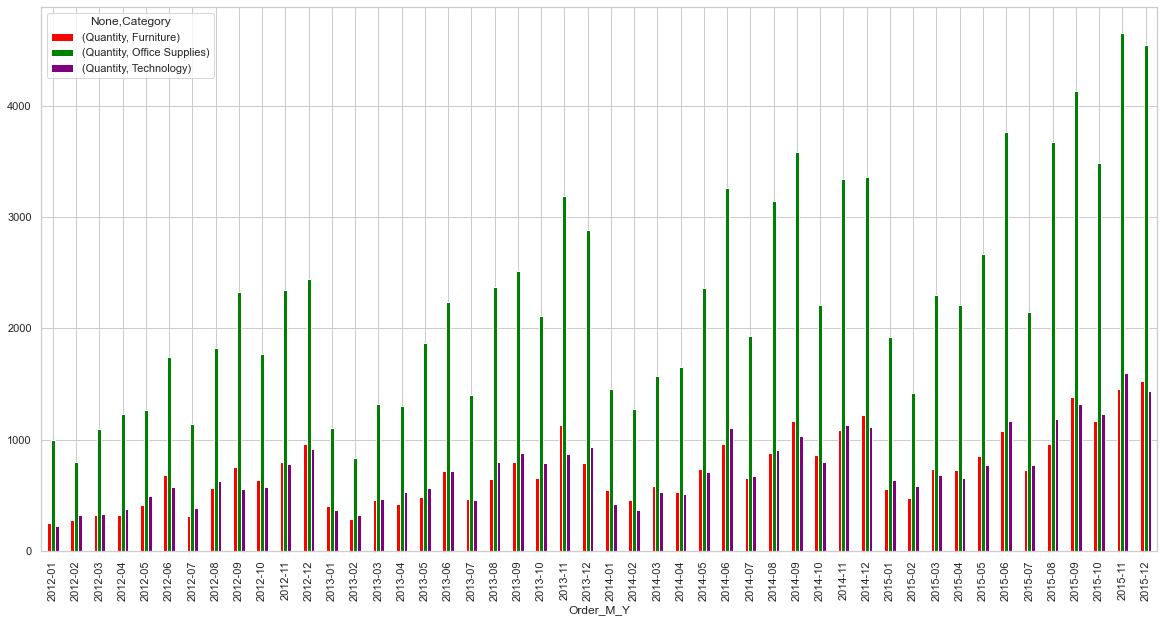

In [85]:
group_season.unstack().plot(kind='bar', color=['red', 'green', 'purple'])

### #2.2

## Problem 3

### #3.1

In [86]:
raw_returns = pd.read_csv('../data/Returns.csv')
raw_returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [87]:
raw_returns.columns = list(map(lambda x: x.replace(' ', '_'), raw_returns.columns))
raw_returns.head()

,Returned,Order_ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [88]:
raw_returns.shape

(1079, 3)

In [89]:
raw_returns.Returned.value_counts()

Yes    1079
Name: Returned, dtype: int64

In [90]:
data_returns = pd.merge(season_data, raw_returns, on='Order_ID')

# if we do an inner join without specifying the key, it joins by row index
data_returns

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,State,Country,Region_x,Market,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Order_M_Y,Ship_M_Y,Returned,Region_y
0,9065,MX-2012-AW1093031-40912,1/4/12,1/8/12,Standard Class,AW-1093031,Arthur Wiediger,Home Office,NaN,Santiago de Cuba,Santiago de Cuba,Cuba,Caribbean,LATAM,TEC-AC-5219,Technology,Accessories,"Memorex Mouse, USB",37.84,2,0.0,2.24,3.937,Medium,2012-01,2012-01,Yes,Caribbean
1,9066,MX-2012-AW1093031-40912,1/4/12,1/8/12,Standard Class,AW-1093031,Arthur Wiediger,Home Office,NaN,Santiago de Cuba,Santiago de Cuba,Cuba,Caribbean,LATAM,FUR-CH-5757,Furniture,Chairs,"SAFCO Chairmat, Black",38.26,1,0.0,6.88,4.253,Medium,2012-01,2012-01,Yes,Caribbean
2,9067,MX-2012-AW1093031-40912,1/4/12,1/8/12,Standard Class,AW-1093031,Arthur Wiediger,Home Office,NaN,Santiago de Cuba,Santiago de Cuba,Cuba,Caribbean,LATAM,OFF-EN-5041,Office Supplies,Envelopes,"Kraft Peel and Seal, Recycled",38.58,3,0.0,7.68,3.514,Medium,2012-01,2012-01,Yes,Caribbean
3,16316,ES-2012-DJ1351048-40923,1/15/12,1/20/12,Second Class,DJ-1351048,Don Jones,Corporate,NaN,Langen,Lower Saxony,Germany,Western Europe,Europe,TEC-CO-4570,Technology,Copiers,"Hewlett Copy Machine, Laser",526.62,2,0.0,10.50,92.100,Medium,2012-01,2012-01,Yes,Western Europe
4,16314,ES-2012-DJ1351048-40923,1/15/12,1/20/12,Second Class,DJ-1351048,Don Jones,Corporate,NaN,Langen,Lower Saxony,Germany,Western Europe,Europe,OFF-SU-4120,Office Supplies,Supplies,"Elite Letter Opener, Easy Grip",54.60,2,0.0,2.16,4.120,Medium,2012-01,2012-01,Yes,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,36706,CA-2015-DM13345140-42347,12/9/15,12/15/15,Standard Class,DM-133451404,Denise Monton,Corporate,94109.0,San Francisco,California,United States,Western US,USCA,OFF-BI-6345,Office Supplies,Binders,Vinyl Sectional Post Binders,90.48,3,0.2,33.93,9.140,Low,2015-12,2015-12,Yes,Western US
2216,36707,CA-2015-DM13345140-42347,12/9/15,12/15/15,Standard Class,DM-133451404,Denise Monton,Corporate,94109.0,San Francisco,California,United States,Western US,USCA,OFF-ST-5789,Office Supplies,Storage,"SAFCO Mobile Desk Side File, Wire Frame",42.76,1,0.0,11.12,6.210,Low,2015-12,2015-12,Yes,Western US
2217,36704,CA-2015-DM13345140-42347,12/9/15,12/15/15,Standard Class,DM-133451404,Denise Monton,Corporate,94109.0,San Francisco,California,United States,Western US,USCA,OFF-PA-6102,Office Supplies,Paper,Standard Line “While You Were Out” Hardbound T...,87.92,4,0.0,40.44,2.270,Low,2015-12,2015-12,Yes,Western US
2218,36705,CA-2015-DM13345140-42347,12/9/15,12/15/15,Standard Class,DM-133451404,Denise Monton,Corporate,94109.0,San Francisco,California,United States,Western US,USCA,OFF-BI-5588,Office Supplies,Binders,"Performers Binder/Pad Holder, Black",22.42,1,0.2,8.41,2.390,Low,2015-12,2015-12,Yes,Western US


In [91]:
# data_returns = pd.concat([season_data, raw_returns[['Returned']]], axis=1, join='inner', keys='Order_ID')

# # if we do an inner join without specifying the key, it joins by row index
# data_returns

In [92]:
np.sum(data_returns[data_returns['Profit'] < 0].Profit)

-36832.600000000006

In [93]:
group_loss = data_returns[data_returns['Profit'] < 0]
group_loss = group_loss.groupby(group_loss.Order_M_Y.dt.year)[['Profit']].agg('sum')
group_loss

,Profit
Order_M_Y,
2012,-5772.54
2013,-7713.03
2014,-7439.43
2015,-15907.60


### #3.2

In [94]:
return_1 = np.sum(data_returns.groupby(['Customer_ID'])[['Returned']].count() > 1)

return_1

Returned    547
dtype: int64

In [95]:
return_5 = data_returns.groupby(['Customer_ID'])[['Returned']].count() > 5
return_5 = return_5[return_5['Returned']==True]
return_5.count()

Returned    46
dtype: int64

### #3.3

<AxesSubplot:xlabel='Region_y'>

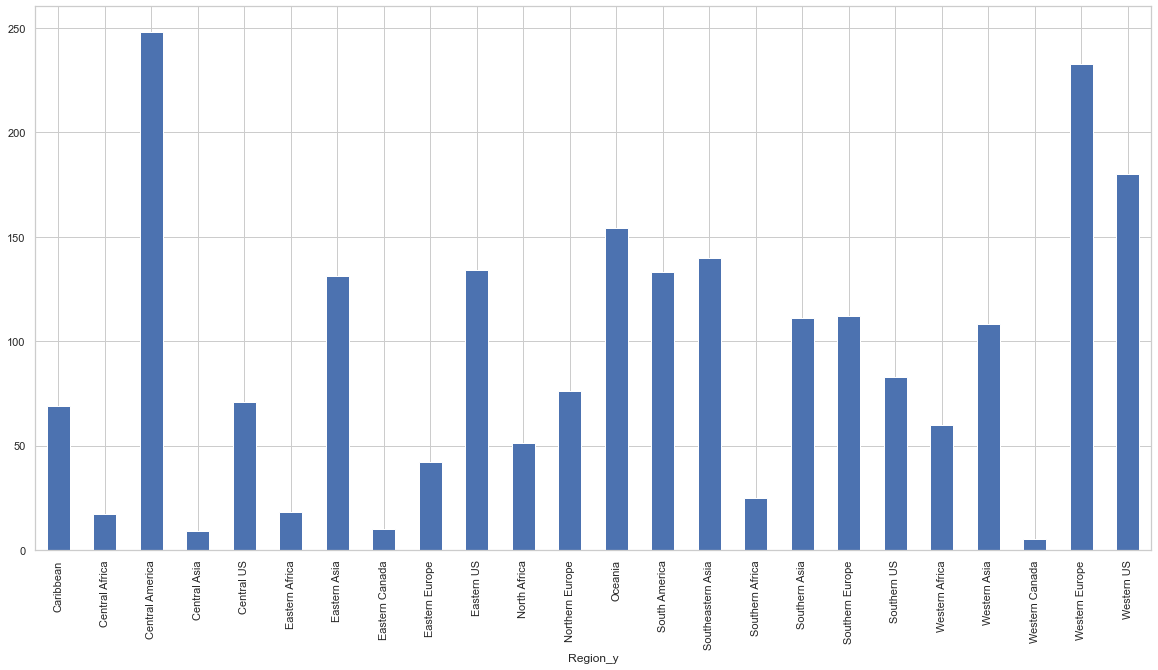

In [96]:
by_region = data_returns.groupby(['Region_y']).size()
by_region.plot.bar()

### #3.4

<AxesSubplot:xlabel='Sub_Category'>

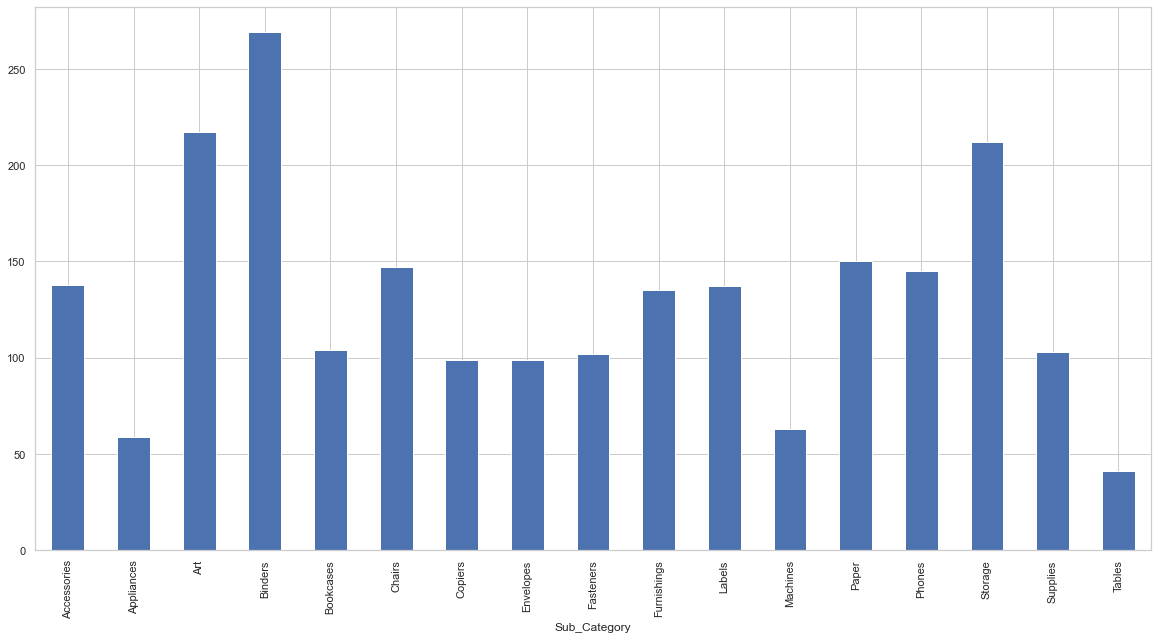

In [97]:
by_category = data_returns.groupby(['Sub_Category']).size()
by_category.plot.bar()

# Part II

## Problem 4

### #4.1

In [98]:
# Return an outer join based on the 'Order_ID' key named 'returns_cat'
    # The 'Returned' column will return NaN for items not returned
    
# Concatenating the 2 dataframes alters the column names

returns_cat = pd.concat([data_orders, data_returns[['Returned']]],
                        axis=1,
                        ignore_index=True,
                        keys='Order_ID')
returns_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.770,High,Yes
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.630,Critical,Yes
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.490,Medium,Yes
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.160,Medium,Yes
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.040,Critical,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,6/19/15,6/19/15,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,Hiroshima,Japan,Eastern Asia,Asia Pacific,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.10,5,0.0,4.50,1.010,Medium,NaN
51286,34337,US-2014-ZD21925140-41765,5/6/14,5/10/14,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,Tennessee,United States,Southern US,USCA,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.72,5,0.2,3.34,1.930,High,NaN
51287,31315,CA-2012-ZD21925140-41147,8/26/12,8/31/12,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,California,United States,Western US,USCA,OFF-AR-5321,Office Supplies,Art,Newell 341,8.56,2,0.0,2.48,1.580,High,NaN
51288,9596,MX-2013-RB1979518-41322,2/17/13,2/21/13,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,São Paulo,Brazil,South America,LATAM,OFF-BI-2919,Office Supplies,Binders,"Acco Index Tab, Economy",13.44,2,0.0,2.40,1.003,Medium,NaN


In [99]:
# Create a new list of column names
# Append the 'Returned' column name to the new list

new_cols = list(data_orders.columns)
new_cols.append('Returned')
new_cols

['Row_ID',
 'Order_ID',
 'Order_Date',
 'Ship_Date',
 'Ship_Mode',
 'Customer_ID',
 'Customer_Name',
 'Segment',
 'Postal_Code',
 'City',
 'State',
 'Country',
 'Region',
 'Market',
 'Product_ID',
 'Category',
 'Sub_Category',
 'Product_Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping_Cost',
 'Order_Priority',
 'Returned']

In [100]:
# Assign the column names to the returns_cat dataframe

returns_cat.columns = new_cols
returns_cat.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Postal_Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product_ID', 'Category',
       'Sub_Category', 'Product_Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping_Cost', 'Order_Priority', 'Returned'],
      dtype='object')

In [101]:
# Get a sample to make sure that everything is in order

returns_cat.sample(10)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,State,Country,Region,Market,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Returned
28713,9843,US-2012-EB1397555-41273,12/30/12,1/3/13,Standard Class,EB-1397555,Erica Bern,Corporate,NaN,Tegucigalpa,Francisco Morazán,Honduras,Central America,LATAM,FUR-BO-5967,Furniture,Bookcases,"Sauder Library with Doors, Mobile",468.18,3,0.40,-124.86,6.100,Medium,NaN
44949,31269,IN-2014-CM1265592-41991,12/18/14,12/21/14,Second Class,CM-1265592,Corinna Mitchell,Home Office,NaN,Taupo,Waikato,New Zealand,Oceania,Asia Pacific,OFF-BI-4823,Office Supplies,Binders,"Ibico Hole Reinforcements, Clear",25.80,4,0.00,2.76,1.680,Medium,NaN
9477,10218,US-2013-MH1762018-41612,12/4/13,12/7/13,Second Class,MH-1762018,Matt Hagelstein,Corporate,NaN,Bezerros,Pernambuco,Brazil,South America,LATAM,OFF-AP-4506,Office Supplies,Appliances,"Hamilton Beach Stove, Red",289.25,2,0.60,-347.11,34.947,Medium,NaN
41597,33294,CA-2012-ND18460140-40946,2/7/12,2/10/12,First Class,ND-184601408,Neil Ducich,Corporate,23320.0,Chesapeake,Virginia,United States,Southern US,USCA,OFF-LA-3199,Office Supplies,Labels,Avery 480,15.00,4,0.00,7.20,2.270,Medium,NaN
7180,27742,IN-2015-NZ1856558-42137,5/13/15,5/17/15,Standard Class,NZ-1856558,Nick Zandusky,Home Office,NaN,Hyderabad,Telangana,India,Southern Asia,Asia Pacific,OFF-ST-5700,Office Supplies,Storage,"Rogers Lockers, Blue",423.24,2,0.00,21.12,47.530,Medium,NaN
36118,6541,MX-2014-JC1534098-41996,12/23/14,12/29/14,Standard Class,JC-1534098,Jasper Cacioppo,Consumer,NaN,Panama City,Panama,Panama,Central America,LATAM,FUR-CH-5367,Furniture,Chairs,"Novimex Bag Chairs, Black",34.82,2,0.40,2.30,3.254,Low,NaN
21551,49265,AG-2014-AH100753-41760,5/1/14,5/3/14,First Class,AH-100753,Adam Hart,Corporate,NaN,Oran,Oran,Algeria,North Africa,Africa,OFF-AR-3552,Office Supplies,Art,"Boston Sketch Pad, Blue",48.60,1,0.00,20.88,10.940,High,NaN
5391,24824,ID-2013-RH1955559-41525,9/8/13,9/15/13,Standard Class,RH-1955559,Ritsa Hightower,Consumer,NaN,Semarang,Jawa Tengah,Indonesia,Southeastern Asia,Asia Pacific,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",1317.33,4,0.07,297.45,61.860,Medium,NaN
18243,39585,CA-2012-DH13675140-41132,8/11/12,8/15/12,Standard Class,DH-136751408,Duane Huffman,Home Office,33180.0,Miami,Florida,United States,Southern US,USCA,TEC-AC-5178,Technology,Accessories,Maxell 4.7GB DVD-R,158.93,7,0.20,41.72,14.000,High,NaN
41130,45724,TU-2013-MK7905134-41619,12/11/13,12/14/13,Second Class,MK-7905134,Michael Kennedy,Corporate,NaN,Kahramanmaras,Kahramanmaras,Turkey,Western Asia,Asia Pacific,OFF-ST-6038,Office Supplies,Storage,"Smead Folders, Blue",13.99,2,0.60,-16.85,2.030,Medium,NaN


In [102]:
# Fill NaN with 0 so that we can use binary
# Swap out 'Yes' with 1 so that we can use binary
# Convert the 'Returned' column to integer

returns_cat['Returned'] = returns_cat['Returned'].fillna(0)
returns_cat.loc[returns_cat['Returned']=='Yes', 'Returned'] = 1
pd.to_numeric(returns_cat['Returned'])
returns_cat.sample(20)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,State,Country,Region,Market,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Returned
21193,3169,US-2013-TB2128055-41619,12/11/13,12/13/13,Second Class,TB-2128055,Toby Braunhardt,Consumer,NaN,Choloma,Cortés,Honduras,Central America,LATAM,TEC-AC-5115,Technology,Accessories,"Logitech Keyboard, Bluetooth",86.94,3,0.40,-21.78,11.252,High,0
45823,19997,IT-2015-ZC21910124-42028,1/24/15,1/30/15,Standard Class,ZC-21910124,Zuschuss Carroll,Consumer,NaN,Stockholm,Stockholm,Sweden,Northern Europe,Europe,OFF-FA-3069,Office Supplies,Fasteners,"Advantus Staples, Assorted Sizes",8.31,2,0.50,-1.35,1.600,Low,0
24114,47316,IR-2015-CD198060-42038,2/3/15,2/6/15,First Class,CD-198060,Carol Darley,Consumer,NaN,Ardabil,Ardabil,Iran,Southern Asia,Asia Pacific,OFF-LA-3322,Office Supplies,Labels,"Avery Shipping Labels, Alphabetical",23.34,2,0.00,7.20,8.810,Critical,0
1011,1320,MX-2014-KA1652539-41922,10/10/14,10/12/14,First Class,KA-1652539,Kelly Andreada,Consumer,NaN,Mejicanos,San Salvador,El Salvador,Central America,LATAM,FUR-BO-5763,Furniture,Bookcases,"Safco Classic Bookcase, Traditional",584.20,2,0.00,239.52,201.969,Critical,1
63,10549,IT-2014-KC1667548-41882,8/31/14,9/3/14,First Class,KC-1667548,Kimberly Carter,Corporate,NaN,Celle,Lower Saxony,Germany,Western Europe,Europe,TEC-PH-3130,Technology,Phones,"Apple Audio Dock, with Caller ID",1502.01,9,0.00,225.18,600.210,Critical,1
12879,21055,IN-2013-Dl13600121-41621,12/13/13,12/15/13,First Class,Dl-13600121,Dorris liebe,Corporate,NaN,Colombo,Western,Sri Lanka,Southern Asia,Asia Pacific,OFF-SU-4320,Office Supplies,Supplies,"Fiskars Shears, High Speed",95.28,2,0.00,31.44,24.300,Critical,0
42432,22552,ID-2015-BB10990102-42273,9/26/15,10/2/15,Standard Class,BB-10990102,Barry Blumstein,Corporate,NaN,Manila,National Capital,Philippines,Southeastern Asia,Asia Pacific,OFF-LA-4679,Office Supplies,Labels,"Hon Removable Labels, Adjustable",23.43,4,0.45,-8.97,1.910,Medium,0
31280,28961,IN-2015-TT210707-42054,2/19/15,2/22/15,Second Class,TT-210707,Ted Trevino,Consumer,NaN,Tamworth,New South Wales,Australia,Oceania,Asia Pacific,FUR-FU-4086,Furniture,Furnishings,"Eldon Photo Frame, Erganomic",153.17,3,0.10,25.46,4.950,Medium,0
13740,46415,CG-2013-JK564033-41475,7/20/13,7/21/13,First Class,JK-564033,Jim Kriz,Home Office,NaN,Kinshasa,Kinshasa,Democratic Republic of the Congo,Central Africa,Africa,FUR-FU-3035,Furniture,Furnishings,"Advantus Frame, Erganomic",109.74,1,0.00,35.10,22.260,High,0
7360,6384,MX-2014-CR1282018-41807,6/17/14,6/19/14,Second Class,CR-1282018,Cyra Reiten,Home Office,NaN,Jundiaí,São Paulo,Brazil,South America,LATAM,OFF-ST-4260,Office Supplies,Storage,"Fellowes File Cart, Wire Frame",272.76,3,0.00,13.62,46.273,Critical,0


### #4.2

In [103]:
# Convert the Ship_Date and Order_Date columns to datetime
# Create a column called 'Process_Time'
    # Must use dt.days because without it, the result would be '# Days' rather than #

returns_cat[['Ship_Date', 'Order_Date']] = returns_cat[['Ship_Date', 'Order_Date']].apply(pd.to_datetime)

returns_cat['Process_Time'] = (returns_cat['Ship_Date'] - returns_cat['Order_Date']).dt.days
returns_cat

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,State,Country,Region,Market,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Returned,Process_Time
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.770,High,1,2
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.630,Critical,1,2
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.490,Medium,1,1
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.160,Medium,1,2
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.040,Critical,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,Hiroshima,Japan,Eastern Asia,Asia Pacific,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.10,5,0.0,4.50,1.010,Medium,0,0
51286,34337,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,Tennessee,United States,Southern US,USCA,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.72,5,0.2,3.34,1.930,High,0,4
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,California,United States,Western US,USCA,OFF-AR-5321,Office Supplies,Art,Newell 341,8.56,2,0.0,2.48,1.580,High,0,5
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,São Paulo,Brazil,South America,LATAM,OFF-BI-2919,Office Supplies,Binders,"Acco Index Tab, Economy",13.44,2,0.0,2.40,1.003,Medium,0,4


In [104]:
# Check .info() to see if the last column is indeed an integer value

returns_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row_ID          51290 non-null  int64         
 1   Order_ID        51290 non-null  object        
 2   Order_Date      51290 non-null  datetime64[ns]
 3   Ship_Date       51290 non-null  datetime64[ns]
 4   Ship_Mode       51290 non-null  object        
 5   Customer_ID     51290 non-null  object        
 6   Customer_Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal_Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product_ID      51290 non-null  object        
 15  Ca

### #4.3

In [105]:
# General check of groupby

returns_cat.groupby(['Product_ID']).agg('count')[['Sales']]

,Sales
Product_ID,
FUR-BO-3174,2
FUR-BO-3175,8
FUR-BO-3176,6
FUR-BO-3177,8
FUR-BO-3409,8
...,...
TEC-PH-6365,10
TEC-PH-6413,6
TEC-PH-6425,7


In [64]:
# Check a single Product_ID

returns_cat[returns_cat['Product_ID']=='FUR-BO-3175']

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,State,Country,Region,Market,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Returned,Process_Time
8442,32836,CA-2015-CL11890140-42263,2015-09-16,2015-09-18,Second Class,CL-118901406,Carl Ludwig,Consumer,2149.0,Everett,Massachusetts,United States,Eastern US,USCA,FUR-BO-3175,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",782.94,3,0.00,203.56,123.26,High,0,2
25713,38147,US-2014-JO15145140-41647,2014-01-08,2014-01-12,Standard Class,JO-151451402,Jack O'Briant,Corporate,53132.0,Franklin,Wisconsin,United States,Central US,USCA,FUR-BO-3175,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",1565.88,6,0.00,407.13,102.06,Medium,0,4
37657,31489,CA-2013-MP17470140-41559,2013-10-12,2013-10-14,First Class,MP-174701406,Mark Packer,Home Office,10035.0,New York City,New York,United States,Eastern US,USCA,FUR-BO-3175,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",626.35,3,0.20,46.98,160.17,Critical,0,2
39387,31666,CA-2014-MK17905140-41934,2014-10-22,2014-10-22,Same Day,MK-179051406,Michael Kennedy,Corporate,6040.0,Manchester,Connecticut,United States,Eastern US,USCA,FUR-BO-3175,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",1043.92,4,0.00,271.42,152.15,High,0,0
45816,35682,US-2013-RA19915140-41475,2013-07-20,2013-07-27,Standard Class,RA-199151402,Russell Applegate,Consumer,60035.0,Highland Park,Illinois,United States,Central US,USCA,FUR-BO-3175,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",913.43,5,0.30,-52.20,75.55,Low,0,7
46854,33650,CA-2013-SC20260140-41517,2013-08-31,2013-09-02,First Class,SC-202601404,Scott Cohen,Corporate,94122.0,San Francisco,California,United States,Western US,USCA,FUR-BO-3175,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",1552.83,7,0.15,200.95,343.97,High,0,2
48253,31335,CA-2013-SN20710140-41635,2013-12-27,2013-12-31,Standard Class,SN-207101402,Steve Nguyen,Home Office,77041.0,Houston,Texas,United States,Central US,USCA,FUR-BO-3175,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.40,3,0.32,-46.98,10.68,Medium,0,4
50065,37252,CA-2012-TS21430140-41223,2012-11-10,2012-11-14,Second Class,TS-214301406,Tom Stivers,Corporate,19601.0,Reading,Pennsylvania,United States,Eastern US,USCA,FUR-BO-3175,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",521.96,4,0.50,-250.54,41.99,Medium,0,4


In [110]:
# Filter for returns (==1)
# Group by Product_ID

returns_cat_yes = returns_cat[returns_cat['Returned']==1].groupby('Product_ID').agg('count')[['Returned']]
returns_cat_yes

,Returned
Product_ID,
FUR-BO-3176,1
FUR-BO-3624,7
FUR-BO-3625,3
FUR-BO-3626,5
FUR-BO-3627,8
...,...
TEC-PH-5842,8
TEC-PH-5843,3
TEC-PH-5844,2


In [120]:
# Filter for returns (==0)
# 

returns_cat_no = returns_cat[returns_cat['Returned']==0].groupby('Product_ID').agg('count')[['Returned']]

returns_cat_no.loc[returns_cat_no['Returned']!=0, 'Returned']=0
returns_cat_no

,Returned
Product_ID,
FUR-BO-3174,0
FUR-BO-3175,0
FUR-BO-3176,0
FUR-BO-3177,0
FUR-BO-3409,0
...,...
TEC-PH-6365,0
TEC-PH-6413,0
TEC-PH-6425,0


In [124]:
# Combine returns_cat_yes and returns_cat_no

returns_cat_full = pd.concat([returns_cat_yes, returns_cat_no], axis=0)
returns_cat_full

,Returned
Product_ID,
FUR-BO-3176,1
FUR-BO-3624,7
FUR-BO-3625,3
FUR-BO-3626,5
FUR-BO-3627,8
...,...
TEC-PH-6365,0
TEC-PH-6413,0
TEC-PH-6425,0
